# Python Project
### Nelson Tran
### 8/24/23

In [81]:
#Importing libraries and data needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cost_of_living_df = pd.read_csv('cost_of_living.csv')
levels_fyi_salary_df = pd.read_csv('Levels_Fyi_Salary_Data.csv')
ds_salaries_df = pd.read_csv('ds_salaries.csv')
country_codes_df = pd.read_excel('country_codes.xlsx')

#to get an idea with what im working with
print(cost_of_living_df.describe().round(2))
print(ds_salaries_df.describe().round(2))

       Rank  Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
count   0.0                578.00      578.00                          578.00   
mean    NaN                 57.54       26.65                           43.06   
std     NaN                 21.66       17.84                           18.90   
min     NaN                 18.55        2.37                           10.97   
25%     NaN                 38.02       12.26                           26.14   
50%     NaN                 62.40       23.28                           44.99   
75%     NaN                 73.03       36.62                           55.72   
max     NaN                149.02      108.42                          124.22   

       Groceries Index  Restaurant Price Index  Local Purchasing Power Index  
count           578.00                  578.00                        578.00  
mean             53.57                   54.35                         71.50  
std              22.13           

In [30]:
#Taking the mean of the median salaries of each work year, taking the median first would try to eliminate outliers (in USD)
median_ds_salaries = ds_salaries_df.groupby('work_year')['salary_in_usd'].agg([np.mean, np.median, np.std])
avg_salary = median_ds_salaries['median'].mean()
avg_salary = np.round(avg_salary)
print(avg_salary)
#assigning the printed value to a variable (in USD)
avg_ds_salary = 92691

92691.0


In [78]:
#For simplicity each cost of living index will be weighted equally
cost_of_living_df['composite_score'] = (cost_of_living_df['Cost of Living Index']+
                                       cost_of_living_df['Rent Index']+
                                       cost_of_living_df['Cost of Living Plus Rent Index']+
                                       cost_of_living_df['Groceries Index']+
                                       cost_of_living_df['Restaurant Price Index']+
                                       cost_of_living_df['Local Purchasing Power Index'])/6

cost_of_living_df = cost_of_living_df.sort_values(by='composite_score', ascending=False)
print((cost_of_living_df).tail(6))

     Rank                  City  Cost of Living Index  Rent Index  \
574   NaN     Karachi, Pakistan                 20.75        4.84   
569   NaN      Lahore, Pakistan                 21.53        4.03   
575   NaN  Rawalpindi, Pakistan                 20.52        4.78   
571   NaN    Kabul, Afghanistan                 21.35        3.17   
577   NaN    Peshawar, Pakistan                 18.55        2.37   
576   NaN      Multan, Pakistan                 18.68        2.94   

     Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
574                           13.29            18.48                   15.21   
569                           13.33            18.48                   17.34   
575                           13.14            18.51                   16.18   
571                           12.83            15.22                   14.85   
577                           10.97            16.62                   14.39   
576                           11.30 

In [79]:
#Looking at the salary-to-index ratio for each location
low_comp_score_df = cost_of_living_df[cost_of_living_df["composite_score"]<16.6]
print(low_comp_score_df)

salary_to_index_ratio = (avg_ds_salary) / low_comp_score_df['composite_score']
print(salary_to_index_ratio)
#Seeing this salary-to-index ratio shows that our salary would go the farthest in these 5 locations

     Rank                  City  Cost of Living Index  Rent Index  \
569   NaN      Lahore, Pakistan                 21.53        4.03   
575   NaN  Rawalpindi, Pakistan                 20.52        4.78   
571   NaN    Kabul, Afghanistan                 21.35        3.17   
577   NaN    Peshawar, Pakistan                 18.55        2.37   
576   NaN      Multan, Pakistan                 18.68        2.94   

     Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
569                           13.33            18.48                   17.34   
575                           13.14            18.51                   16.18   
571                           12.83            15.22                   14.85   
577                           10.97            16.62                   14.39   
576                           11.30            18.37                   11.80   

     Local Purchasing Power Index  composite_score  location_index  
569                         24.42  

In [47]:
#Checking to see if there is any city id from 'Levels_Fyi_Salary_Data' matches our 5 locations
locations_to_check = ('Lahore', 'Rawalpindi', 'Kabul', 'Peshawar', 'Multan')

city_id_check = levels_fyi_salary_df['location'].isin(locations_to_check)

for value, result in zip(locations_to_check, city_id_check):
    if result:
        print(f"{value} is in the 'location' column.")
    else:
        print(f"{value} is not in 'location' column.")
#from this we can see that there is no city id that match any of our 5 locations

Lahore is not in 'location' column.
Rawalpindi is not in 'location' column.
Kabul is not in 'location' column.
Peshawar is not in 'location' column.
Multan is not in 'location' column.


In [51]:
#Checking to see if any of 5 locations country codes show up in "country_codes_df"
country_num_id = country_codes_df[(country_codes_df['Country'] == 'Afghanistan') |
                                  (country_codes_df['Country'] == 'Pakistan')]
print(country_num_id)
#Countries codes for AFG and PAK shown but since 4 out of 5 locations are in AFG, we use city names instead to avoid confusion

         Country Alpha-2 code Alpha-3 code  Numeric
0    Afghanistan           AF          AFG        4
166     Pakistan           PK          PAK      586


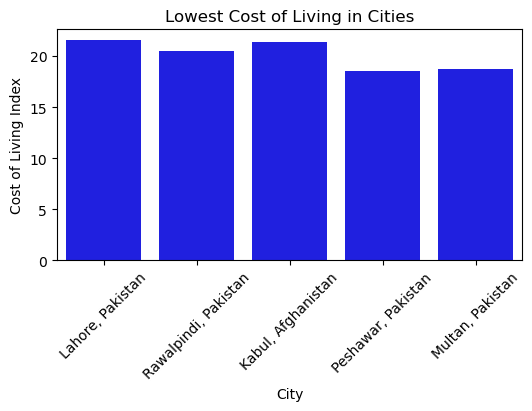

In [88]:
#Graphs showing the individual indexes within the cost of living (COL) index

#COL index
plt.figure(figsize=(6,3))
sns.barplot(x=low_comp_score_df['City'],
            y=low_comp_score_df['Cost of Living Index'],
           color = 'blue')
plt.xlabel('City')
plt.ylabel('Cost of Living Index')
plt.title('Lowest Cost of Living in Cities')
plt.xticks(rotation=45)
plt.show()

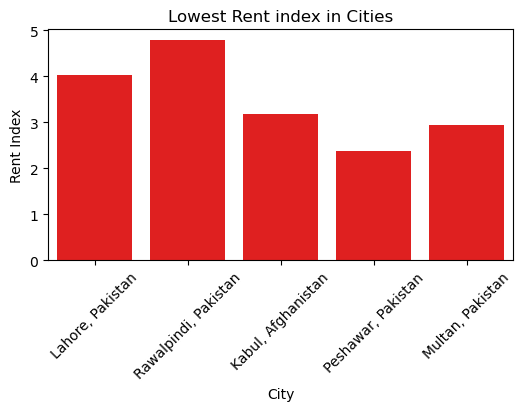

In [87]:
#Rent Index
plt.figure(figsize=(6,3))
sns.barplot(x=low_comp_score_df['City'],
            y=low_comp_score_df['Rent Index'],
           color = 'red')
plt.xlabel('City')
plt.ylabel('Rent Index')
plt.title('Lowest Rent index in Cities')
plt.xticks(rotation=45)
plt.show()

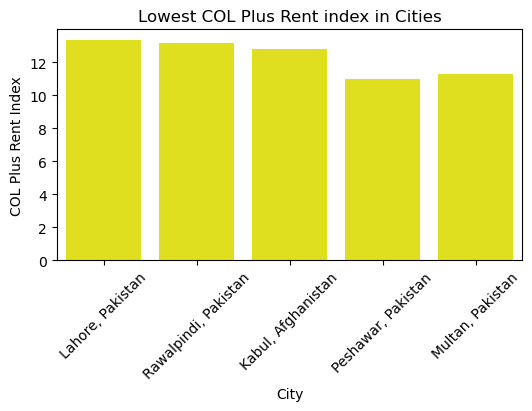

In [89]:
#COL plus Rent index
plt.figure(figsize=(6,3))
sns.barplot(x=low_comp_score_df['City'],
            y=low_comp_score_df['Cost of Living Plus Rent Index'],
           color = 'yellow')
plt.xlabel("City")
plt.ylabel("COL Plus Rent Index")
plt.title('Lowest COL Plus Rent index in Cities')
plt.xticks(rotation=45)
plt.show()

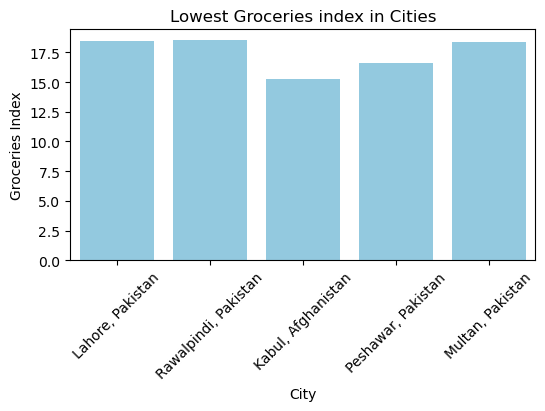

In [90]:
#Goceries Index
plt.figure(figsize=(6,3))
sns.barplot(x=low_comp_score_df['City'],
            y=low_comp_score_df['Groceries Index'],
           color = 'skyblue')
plt.xlabel('City')
plt.ylabel('Groceries Index')
plt.title('Lowest Groceries index in Cities')
plt.xticks(rotation=45)
plt.show()

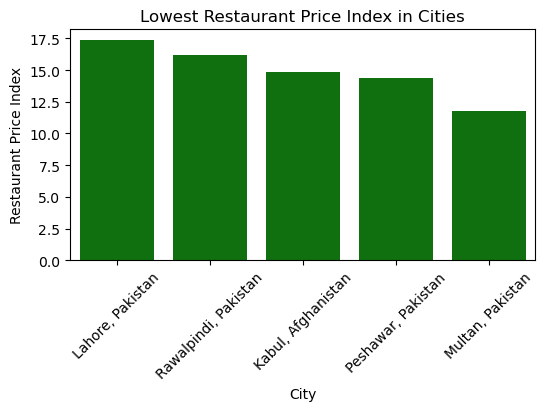

In [91]:
#Restaurant Price Index
plt.figure(figsize=(6,3))
sns.barplot(x=low_comp_score_df['City'],
            y=low_comp_score_df['Restaurant Price Index'],
           color = 'green')
plt.xlabel('City')
plt.ylabel('Restaurant Price Index')
plt.title('Lowest Restaurant Price Index in Cities')
plt.xticks(rotation=45)
plt.show()

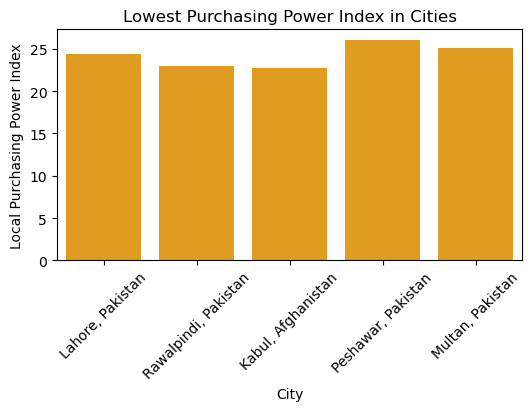

In [92]:
#Local Purchasing Power Index
plt.figure(figsize=(6,3))
sns.barplot(x=low_comp_score_df['City'],
            y=low_comp_score_df['Local Purchasing Power Index'],
           color = 'orange')
plt.xlabel('City')
plt.ylabel('Local Purchasing Power Index')
plt.title('Lowest Purchasing Power Index in Cities')
plt.xticks(rotation=45)
plt.show()